<h1>CS 556 Project</h1>

<h2>Imports</h2>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use(['ggplot'])
%matplotlib inline

<h2> Reading CSV </h2>

In [28]:
df = pd.read_csv('College_Admissions.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<h2>Data and Distribution</h2>

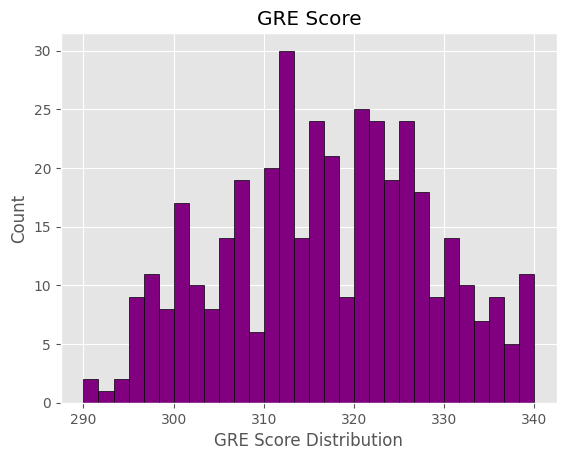

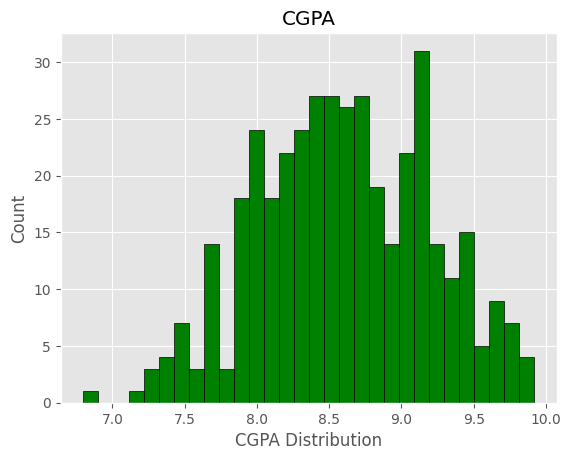

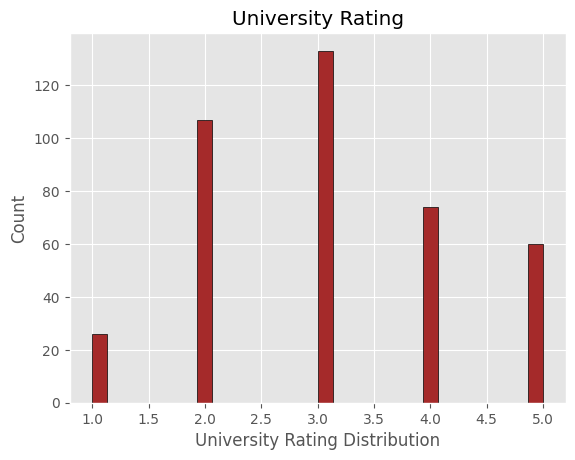

        GRE Score        CGPA  University Rating
count  400.000000  400.000000         400.000000
mean   316.807500    8.598925           3.087500
std     11.473646    0.596317           1.143728
min    290.000000    6.800000           1.000000
25%    308.000000    8.170000           2.000000
50%    317.000000    8.610000           3.000000
75%    325.000000    9.062500           4.000000
max    340.000000    9.920000           5.000000


In [29]:
datasets = ['GRE Score','CGPA','University Rating']
colors = ['purple', 'green', 'brown']

for dataset,c in zip(datasets,colors):
    plt.hist(df[dataset], bins=30, edgecolor = 'black', color= c)
    plt.title(dataset)
    plt.xlabel(f'{dataset} Distribution')
    plt.ylabel('Count')
    plt.show()
print(df[datasets].describe())



<h2> Adding Chance of Admit </h2>

In [30]:
#Calculating correlation matrix
print(df[datasets + ['Chance of Admit ']].corr())


                   GRE Score      CGPA  University Rating  Chance of Admit 
GRE Score           1.000000  0.833060           0.668976          0.802610
CGPA                0.833060  1.000000           0.746479          0.873289
University Rating   0.668976  0.746479           1.000000          0.711250
Chance of Admit     0.802610  0.873289           0.711250          1.000000


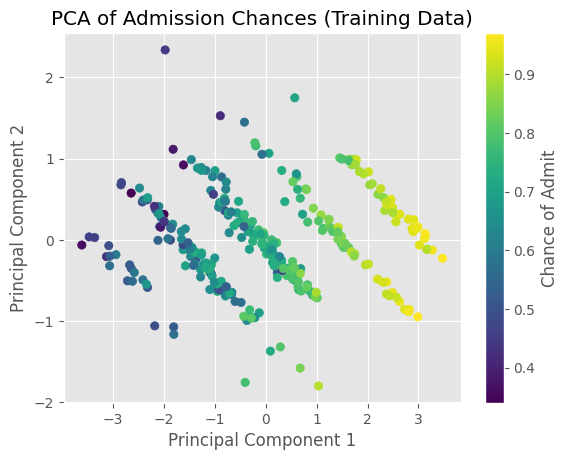

In [ ]:
#Splitting the dataet into a training set and testing set
X = df[datasets]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA to reduce the dimensions to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the PCA-transformed data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA of Admission Chances (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Chance of Admit')
plt.show()


<h2> Training Linear Regression Model </h2>

In [36]:
# Train a Linear Regression model on PCA-reduced data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict and calculate MSE for PCA-based model
y_pca_pred = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pca_pred)

print(f'Mean Squared Error (MSE) for PCA-based Linear Regression: {mse_pca}')


Mean Squared Error (MSE) for PCA-based Linear Regression: 0.0051508907094527856


In [37]:
# Train a Linear Regression model on the original features
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)

# Predict and calculate MSE for the original model
y_original_pred = model_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_original_pred)

print(f'Mean Squared Error (MSE) for Original Linear Regression: {mse_original}')


Mean Squared Error (MSE) for Original Linear Regression: 0.00484356821966046


In [38]:
# Display comparison
print(f'MSE with PCA-based model: {mse_pca}')
print(f'MSE with original model: {mse_original}')

# Which model performed better?
if mse_pca < mse_original:
    print("The PCA-based model is better.")
else:
    print("The original model is better.")


MSE with PCA-based model: 0.0051508907094527856
MSE with original model: 0.00484356821966046
The original model is better.
